### Nome: João Marcos Alves Modesto Ramos
### Matricula: 3506

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("breastcancerwisconsin.csv")
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def converteDiagnostico(x):
    if x =='M':
        return 1
    else:
        return 0
df['diagnosis'] = df['diagnosis'].apply(converteDiagnostico)

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
dfFeatures = df.drop(['diagnosis'],axis=1)

### Aplicar o método de PCA para reduzir a dimensão do conjunto de dados breast-cancerwisconsin.csv.

O primeiro passo para aplicar o PCA é descobrirmos quais são os elementos mais importantes do dataset. Para isto, vamos primeiro, centralizar as features

In [6]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(dfFeatures)
dfScaled = standard.transform(dfFeatures)
dfScaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Aplicação do PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(dfScaled)

PCA(n_components=3)

In [8]:
dadosPCA = pca.transform(dfScaled)
dadosPCA

array([[ 9.19283683,  1.94858304, -1.1231621 ],
       [ 2.3878018 , -3.76817174, -0.52929288],
       [ 5.73389628, -1.07517378, -0.55174979],
       ...,
       [ 1.25617928, -1.9022967 ,  0.56272859],
       [10.37479406,  1.67201009, -1.87702613],
       [-5.4752433 , -0.67063681,  1.49044632]])

In [9]:
dfPCA = pd.DataFrame(data = dadosPCA,columns=['Componente 1','Componente 2','Componente 3',])
dfPCA

,Componente 1,Componente 2,Componente 3
0,9.192837,1.948583,-1.123162
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551750
3,7.122953,10.275589,-3.232794
4,3.935302,-1.948072,1.389769
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562729
567,10.374794,1.672010,-1.877026


In [23]:
finalDf = pd.concat([dfPCA,pd.DataFrame(df,columns = ['diagnosis'])], axis = 1)
finalDf.head()

,Componente 1,Componente 2,Componente 3,diagnosis
0,9.192837,1.948583,-1.123162,1
1,2.387802,-3.768172,-0.529293,1
2,5.733896,-1.075174,-0.551750,1
3,7.122953,10.275589,-3.232794,1
4,3.935302,-1.948072,1.389769,1


In [10]:
print('Explained_variance_ratio: {}'.format(pca.explained_variance_ratio_))
# O Explained_variance_ratio fornecerá a quantidade de informação ou variação que cada componente principal contém após projetar os dados para um subespaço dimensional inferior.
# O Componente 1 tem 44.2% da informação
# O Componente 2 tem 18.9% da informação
# O Componente 3 tem 9.4% da informação
# Houve perda de 27.3% da informação

Explained_variance_ratio: [0.44272026 0.18971182 0.09393163]


<Figure size 432x288 with 0 Axes>

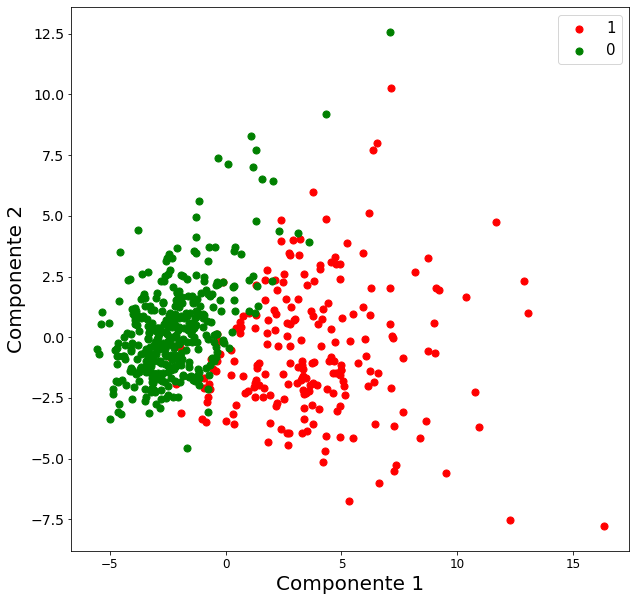

In [12]:
import matplotlib.pyplot as plt

def mostrarSeparacao(x,y):
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel(x,fontsize=20)
    plt.ylabel(y,fontsize=20)
    targets = [1, 0]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = df['diagnosis'] == target
        plt.scatter(dfPCA.loc[indicesToKeep, x]
                   , dfPCA.loc[indicesToKeep, y], c = color, s = 50)

    plt.legend(targets,prop={'size': 15})

mostrarSeparacao("Componente 1","Componente 2")

<Figure size 432x288 with 0 Axes>

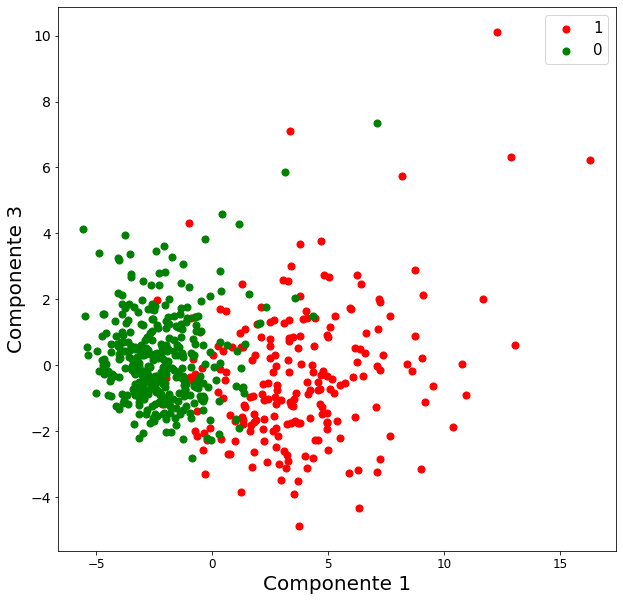

In [13]:
mostrarSeparacao("Componente 1","Componente 3")

<Figure size 432x288 with 0 Axes>

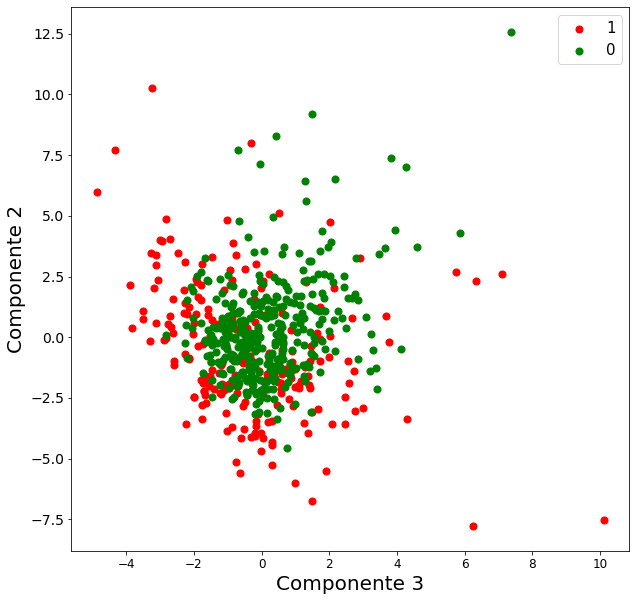

In [14]:
mostrarSeparacao("Componente 3","Componente 2")

### Aplicando a predição

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import re, time
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report




In [15]:
def classifier(X_train,X_test,Y_train,Y_test, model):    
    ini = time.time() #Inicio do calculo do tempo
    model.fit(X_train,Y_train)
    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo
    print(classification_report(Y_test,model.predict(X_test)))
    return model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        36

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



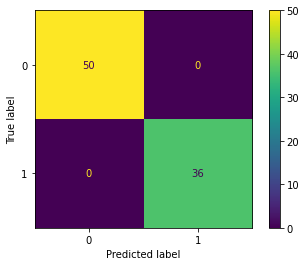

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(
    df, df['diagnosis'], test_size=0.15, random_state=0
)
model = DecisionTreeClassifier()
result = classifier(X_train,X_test,Y_train,Y_test, model)
plot_confusion_matrix(result, X_test, Y_test)

#Foi testado tanto com o DecisionTree e o RandomForest, ambos estão dando 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        36

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



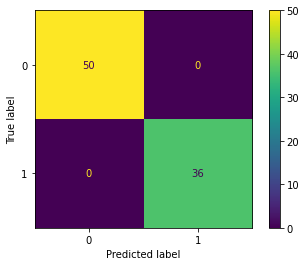

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(
    finalDf, finalDf['diagnosis'], test_size=0.15, random_state=0
)
model = DecisionTreeClassifier()
result = classifier(X_train,X_test,Y_train,Y_test, model)
plot_confusion_matrix(result, X_test, Y_test)